In [23]:
import pandas as pd
import random 
import numpy as np
from scipy.spatial import distance_matrix
import time
import warnings
from tqdm import tqdm 
import itertools
warnings.filterwarnings('ignore')

In [37]:
tsp_c = pd.read_csv("TSPC.csv", sep=';', header=None)
tsp_d = pd.read_csv("TSPD.csv", sep=';', header=None)

In [25]:
def get_random_solution():
    return random.sample([i for i in range(0, 200)], 100)

def calulate_total_cost(path):
    total = 0
    nr = len(path)
    for idx, node in enumerate(path):
        total += dm[node][path[(idx+1)%nr]]
    return total

def generate_dm(df, show=True):
    temp = df[[0, 1]].to_numpy()
    dm = distance_matrix(temp, temp)


    temp = df[2].to_numpy() // 2
    temp = temp * np.ones((200, 200))
    dm = dm+temp+temp.T
    dm = dm // 1

    for i in range(200):
        dm[i][i] = np.inf
    
    if show: 
        df_dist = pd.DataFrame(dm)
        display(df_dist)
    return dm

In [26]:
def gen_node_exchange_moves(path):
    not_selected = list(set([i for i in range(200)]) - set(path))
    node_moves = []
    for idx, node in enumerate(path):
        for new_node in not_selected:
            new_cost = dm[path[idx-1]][new_node] + dm[path[(idx+1)%100]][new_node] # two new edges
            new_cost -= (dm[path[idx-1]][node] + dm[path[(idx+1)%100]][node]) #
            node_moves.append((new_cost, 'n', idx, new_node)) #cost, type, idx of old move, new_node
    return node_moves

In [27]:
def gen_edge_exchange_moves(path):
    edge_moves = []
    for idx1, idx2 in all_posibble_comb:
        if (idx2+1)%100 != idx1:
            new_cost = dm[path[idx1]][path[(idx2+1)%100]] + dm[path[idx1-1]][path[idx2]] #new edges
            new_cost -= (dm[path[idx1-1]][path[idx1]] + dm[path[idx2]][path[(idx2+1)%100]]) #old edges
            edge_moves.append((new_cost, 'e', idx1, idx2))
    return edge_moves

In [28]:
def local_search(dm,all_combinations,path):
    run = True
    while run:
        run = False
        moves = gen_edge_exchange_moves(path) + gen_node_exchange_moves(path)
        moves.sort(key=lambda x:x[0])
        best_move = moves[0]
        if best_move[0] < 0:
            if best_move[1] == 'n':
                idx = best_move[2]
                new_node = best_move[3]
                path[idx] = new_node
                run = True
            else:
                idx1 = best_move[2]
                idx2 = best_move[3]
                path = path[:idx1] + path[idx1:idx2+1][::-1] + path[idx2+1:]
                run = True
    return path

In [29]:
def msls(tsp):
    results = []
#     times = []
    dm = generate_dm(tsp, False)
    all_posibble_comb = list(itertools.combinations([i for i in range(100)], 2))
    for i in tqdm(range(100)):
        path = get_random_solution()
#         start = time.time()
        result = local_search(dm,all_posibble_comb,path)
#         times.append(time.time()-start)
        results.append((result,calulate_total_cost(result)))
    return min(results, key=lambda x: x[1])


In [40]:
dm = generate_dm(tsp_d, False)
all_posibble_comb = list(itertools.combinations([i for i in range(100)], 2))
time_scores = []
scores = []
for i in range(20):
    start = time.time()
    result = msls(tsp_d)
    time_scores.append(time.time()-start)
    scores.append(result)
    

100%|███████████████████████████████████████████████████████████████████████████████████| 100/100 [05:23<00:00,  3.24s/it]


In [41]:
print(min(scores,key=lambda x:x[1]))

([127, 121, 131, 103, 38, 101, 31, 179, 143, 122, 92, 197, 183, 34, 5, 128, 66, 169, 0, 57, 135, 198, 190, 95, 172, 182, 2, 163, 40, 115, 82, 63, 8, 16, 65, 52, 18, 132, 12, 107, 97, 59, 119, 193, 71, 44, 162, 158, 150, 117, 196, 60, 192, 21, 142, 130, 141, 148, 140, 188, 174, 51, 70, 91, 156, 3, 45, 67, 114, 72, 58, 89, 129, 64, 159, 147, 181, 189, 185, 73, 136, 79, 145, 157, 80, 153, 88, 137, 37, 165, 123, 36, 25, 134, 154, 102, 99, 43, 50, 24], 44690.0)


In [42]:
print(max(scores,key=lambda x:x[1]))

([38, 103, 131, 50, 94, 112, 154, 134, 25, 36, 165, 37, 137, 88, 55, 4, 153, 180, 145, 79, 157, 80, 57, 99, 0, 164, 169, 66, 128, 135, 198, 190, 19, 29, 33, 136, 61, 73, 185, 132, 18, 52, 16, 8, 63, 84, 139, 107, 12, 59, 119, 71, 166, 85, 129, 64, 147, 159, 89, 72, 114, 158, 162, 150, 44, 117, 196, 192, 67, 3, 156, 91, 70, 51, 174, 140, 148, 141, 130, 142, 53, 113, 69, 82, 115, 40, 163, 182, 2, 5, 34, 183, 197, 179, 143, 122, 127, 121, 31, 101], 46169.0)


In [43]:
print(np.mean([i[1] for i in scores]))

45498.2


In [45]:
print(min(time_scores))

308.90556621551514


In [46]:
print(max(time_scores))

442.2733647823334


In [47]:
print(np.mean(time_scores))

324.3762295007706


[127, 121, 131, 103, 38, 101, 31, 179, 143, 122, 92, 197, 183, 34, 5, 128, 66, 169, 0, 57, 135, 198, 190, 95, 172, 182, 2, 163, 40, 115, 82, 63, 8, 16, 65, 52, 18, 132, 12, 107, 97, 59, 119, 193, 71, 44, 162, 158, 150, 117, 196, 60, 192, 21, 142, 130, 141, 148, 140, 188, 174, 51, 70, 91, 156, 3, 45, 67, 114, 72, 58, 89, 129, 64, 159, 147, 181, 189, 185, 73, 136, 79, 145, 157, 80, 153, 88, 137, 37, 165, 123, 36, 25, 134, 154, 102, 99, 43, 50, 24]


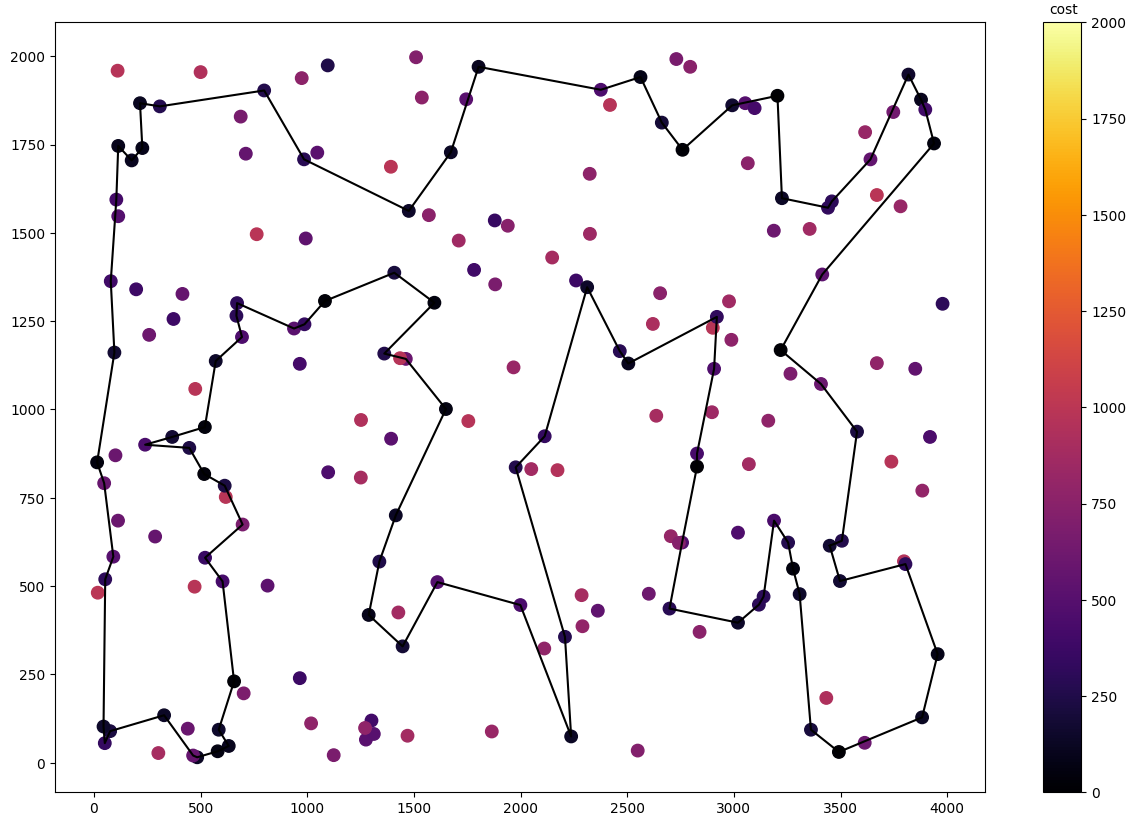

In [44]:
import matplotlib.pyplot as plt

order = min(scores,key=lambda x:x[1])[0]
print(order)
# order = [int(x) for x in order]
cycle = tsp_d.loc[order]
cycle = cycle.append(cycle.iloc[0])

plt.figure(figsize=(15, 10))
plt.scatter(tsp_d[0], tsp_d[1], 80, tsp_d[2], cmap='inferno')
plt.clim(0, 2000)
plt.colorbar().set_label('cost', labelpad=-45, y=1.025, rotation=0)
plt.plot(cycle[0], cycle[1], c='black')
plt.show()

In [49]:
def ils(tsp):
    dm = generate_dm(tsp, False)
    all_posibble_comb = list(itertools.combinations([i for i in range(100)], 2))
    path = get_random_solution()
    result = local_search(dm,all_posibble_comb,path)
    msls_time = 297.8682311534882
    start = time.time()
    while time.time() - start < msls_time:
        random.shuffle(result)
        new_result = local_search(dm,all_posibble_comb,result)
        if calulate_total_cost(new_result) < calulate_total_cost(result):
            result = new_result
    return result

In [50]:
ils_time_scores = []
ils_scores = []
for i in tqdm(range(20)):
    start = time.time()
    result = ils(tsp_d)
    ils_time_scores.append(time.time()-start)
    ils_scores.append((result,calulate_total_cost(result)))


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [1:40:47<00:00, 302.36s/it]


In [51]:
print(min(ils_scores,key=lambda x:x[1]))

([147, 64, 129, 171, 85, 166, 71, 59, 119, 193, 139, 107, 12, 52, 65, 18, 132, 185, 73, 61, 136, 79, 145, 157, 80, 153, 4, 55, 88, 137, 37, 165, 36, 25, 134, 154, 112, 50, 131, 103, 38, 101, 31, 34, 183, 197, 179, 121, 24, 127, 143, 122, 92, 66, 169, 0, 135, 198, 190, 95, 172, 16, 8, 115, 113, 32, 69, 82, 63, 84, 196, 117, 44, 150, 162, 158, 192, 21, 138, 142, 130, 141, 148, 140, 188, 161, 174, 51, 70, 91, 156, 3, 45, 67, 126, 114, 72, 58, 89, 159], 44775.0)


In [52]:
print(max(ils_scores,key=lambda x:x[1]))

([119, 59, 97, 107, 139, 84, 14, 16, 172, 95, 66, 169, 135, 198, 190, 19, 157, 80, 137, 99, 116, 92, 122, 143, 179, 197, 183, 34, 5, 31, 101, 121, 127, 24, 50, 37, 165, 88, 55, 4, 153, 180, 145, 79, 136, 61, 73, 33, 29, 18, 81, 185, 132, 65, 52, 12, 109, 189, 147, 159, 64, 129, 89, 58, 171, 72, 85, 166, 114, 126, 67, 3, 156, 91, 70, 51, 174, 161, 188, 140, 148, 141, 130, 142, 53, 82, 115, 40, 8, 63, 21, 192, 196, 117, 150, 158, 162, 44, 71, 193], 48256.0)


In [53]:
print(np.mean([i[1] for i in ils_scores]))

46410.2


In [54]:
print(min(ils_time_scores))

300.97056794166565


In [55]:
print(max(ils_time_scores))

303.93303894996643


In [56]:
print(np.mean(ils_time_scores))

302.36382439136503


[147, 64, 129, 171, 85, 166, 71, 59, 119, 193, 139, 107, 12, 52, 65, 18, 132, 185, 73, 61, 136, 79, 145, 157, 80, 153, 4, 55, 88, 137, 37, 165, 36, 25, 134, 154, 112, 50, 131, 103, 38, 101, 31, 34, 183, 197, 179, 121, 24, 127, 143, 122, 92, 66, 169, 0, 135, 198, 190, 95, 172, 16, 8, 115, 113, 32, 69, 82, 63, 84, 196, 117, 44, 150, 162, 158, 192, 21, 138, 142, 130, 141, 148, 140, 188, 161, 174, 51, 70, 91, 156, 3, 45, 67, 126, 114, 72, 58, 89, 159]


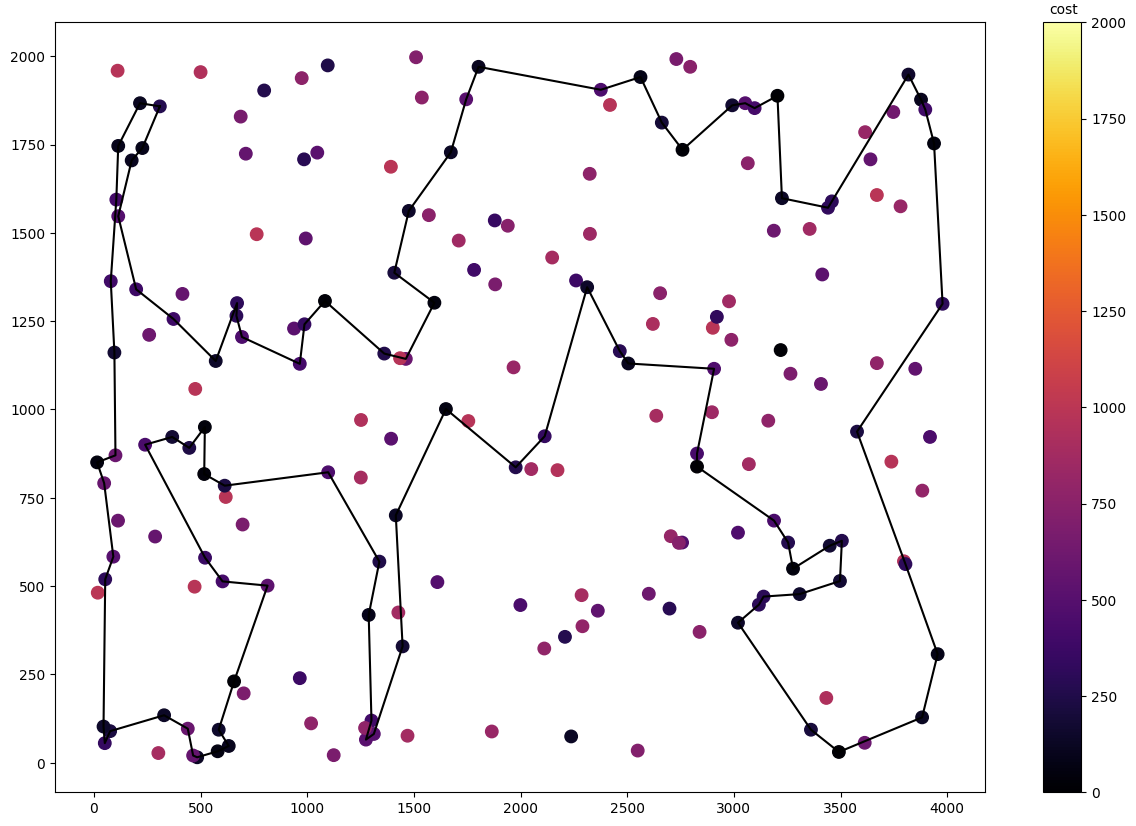

In [57]:
order = min(ils_scores,key=lambda x:x[1])[0]
print(order)
# order = [int(x) for x in order]
cycle = tsp_d.loc[order]
cycle = cycle.append(cycle.iloc[0])

plt.figure(figsize=(15, 10))
plt.scatter(tsp_d[0], tsp_d[1], 80, tsp_d[2], cmap='inferno')
plt.clim(0, 2000)
plt.colorbar().set_label('cost', labelpad=-45, y=1.025, rotation=0)
plt.plot(cycle[0], cycle[1], c='black')
plt.show()